In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [4]:
train = pd.read_csv("total.csv")
df = train

In [5]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [6]:
df.describe()

,timestamp,min_price,max_price,modal_price
count,7.418000e+03,7418.000000,7418.000000,7418.000000
mean,1.523025e+09,2551.547816,2999.163084,2804.140783
std,4.987461e-01,3563.042575,4199.273121,3917.043677
min,1.523025e+09,0.000000,0.000000,0.410000
25%,1.523025e+09,900.000000,1100.000000,1000.000000
50%,1.523025e+09,1650.000000,2000.000000,1828.500000
75%,1.523025e+09,3200.000000,3650.000000,3500.000000
max,1.523025e+09,95000.000000,110000.000000,100000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
timestamp       7418 non-null int64
state           7418 non-null object
district        7418 non-null object
market          7418 non-null object
commodity       7418 non-null object
variety         7418 non-null object
arrival_date    7418 non-null object
min_price       7418 non-null float64
max_price       7418 non-null float64
modal_price     7418 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.6+ KB


In [8]:
df.shape

(7418, 10)

In [9]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

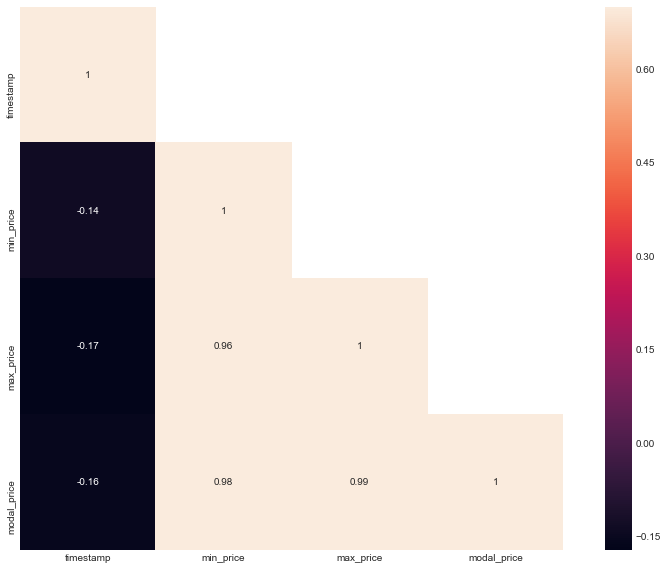

In [10]:
correlation_map = df[df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)
fig.savefig("1.png") 

In [11]:
df.state.unique()

array(['Assam', 'Chattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Meghalaya', 'NCT of Delhi', 'Orissa', 'Pondicherry', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttrakhand', 'West Bengal'], dtype=object)

In [12]:
df.state.nunique()

22

In [13]:
df.district.nunique()

348

In [14]:
df.district.unique()

array(['Barpeta', 'Dhemaji', 'Kamrup', 'Nagaon', 'Nalbari', 'Sonitpur',
       'Bastar', 'Bilaspur', 'Durg', 'Janjgir', 'Mahasamund',
       'North Bastar', 'Rajnandgaon', 'Surguja', 'Ahmedabad', 'Amreli',
       'Anand', 'Banaskanth', 'Bharuch', 'Bhavnagar', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Kheda', 'Mehsana', 'Morbi',
       'Panchmahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha',
       'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Valsad', 'Ambala',
       'Bhiwani', 'Faridabad', 'Fatehabad', 'Jind', 'Kaithal', 'Karnal',
       'Kurukshetra', 'Mahendragarh-Narnaul', 'Panchkula', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Bokaro',
       'Dhanbad', 'East Singhbhum', 'Garhwa', 'Giridih', 'Godda', 'Gumla',
       'Koderma', 'Lohardaga', 'Pakur', 'Ranchi', 'Simdega', 'Bagalkot',
       'Bangalore', 'Belgaum', 'Bellary', 'Bidar', 'Bijapur',
       'Chamraj

In [15]:
df.market.nunique()

990

In [16]:
df.commodity.nunique()

192

In [17]:
df.commodity.unique()

array(['Black Gram (Urd Beans)', 'Corriander seed', 'Jute',
       'Lentil(Masur)', 'Mustard', 'Potato', 'Wheat Atta', 'Maida Atta',
       'Green Chilli', 'Green Gram Dal (Moong Dal)', 'Paddy(Dhan)',
       'Bengal Gram(Gram)', 'Lak(Teora)', 'Onion', 'Tomato', 'Tinda',
       'Mahua', 'Bhindi(Ladies Finger)', 'Lemon', 'Maize', 'Bottle gourd',
       'Brinjal', 'Carrot', 'Methi(Leaves)', 'Cotton',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Chili Red',
       'Cummin Seed(Jeera)', 'Jowar(Sorghum)', 'Methi Seeds',
       'Sesamum(Sesame,Gingelly,Til)', 'Wheat', 'Suva (Dill Seed)',
       'Rajgir', 'Soanf', 'Guar Seed(Cluster Beans Seed)',
       'Coriander(Leaves)', 'Ginger(Green)', 'Groundnut',
       'Arhar (Tur/Red Gram)', 'Beans', 'Soyabean', 'Barley (Jau)',
       'Green Gram (Moong)', 'Groundnut (Split)', 'Isabgul (Psyllium)',
       'Kulthi(Horse Gram)', 'Ground Nut Seed', 'Garlic', 'Cluster beans',
       'Cauliflower', 'Cucumbar(Kheera)', 'Pumpkin', 'Apple',
       'Bit

In [18]:
df.variety.nunique()

337

In [19]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
timestamp       7418 non-null int64
state           7418 non-null object
district        7418 non-null object
market          7418 non-null object
commodity       7418 non-null object
variety         7418 non-null object
arrival_date    7418 non-null object
min_price       7418 non-null float64
max_price       7418 non-null float64
modal_price     7418 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.6+ KB


In [21]:
df.info

<bound method DataFrame.info of        timestamp        state        district                  market  \
0     1523025126        Assam         Barpeta               Bohorihat   
1     1523025126        Assam         Barpeta               Bohorihat   
2     1523025126        Assam         Barpeta               Bohorihat   
3     1523025126        Assam         Barpeta               Bohorihat   
4     1523025126        Assam         Barpeta               Bohorihat   
5     1523025126        Assam         Barpeta               Bohorihat   
6     1523025126        Assam         Dhemaji              Silapathar   
7     1523025126        Assam         Dhemaji              Silapathar   
8     1523025126        Assam          Kamrup  P.O. Uparhali Guwahati   
9     1523025126        Assam          Kamrup  P.O. Uparhali Guwahati   
10    1523025126        Assam          Kamrup  P.O. Uparhali Guwahati   
11    1523025126        Assam          Nagaon                   Dhing   
12    1523025126   

In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_o = df.select_dtypes(include=objects)

In [23]:
newdf.columns               #  numeric columns

Index(['timestamp', 'min_price', 'max_price', 'modal_price'], dtype='object')

In [24]:
df_o.columns                 #  categorical columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date'], dtype='object')

In [25]:
df.state.value_counts()

Uttar Pradesh       2343
Kerala               970
Maharashtra          676
Punjab               599
Karnataka            421
Gujarat              342
West Bengal          302
Haryana              279
Orissa               257
Telangana            245
Himachal Pradesh     239
Tamil Nadu           184
Jharkhand            130
Madhya Pradesh       123
Rajasthan            104
Uttrakhand            71
NCT of Delhi          36
Tripura               33
Chattisgarh           23
Assam                 21
Meghalaya             12
Pondicherry            8
Name: state, dtype: int64

In [26]:
df.district.value_counts()

Agra                  139
Kottayam              137
Palakad               136
Ernakulam             124
Alappuzha             120
Aligarh                98
Thiruvananthapuram     95
Kozhikode(Calicut)     94
Hamirpur               91
Jalandhar              87
Hyderabad              86
Malappuram             83
Kollam                 81
Bangalore              79
Bulandshahar           78
Pune                   77
Sholapur               71
Muzaffarnagar          70
Firozabad              68
Muktsar                66
Kanpur                 65
Jalgaon                64
Ahmednagar             63
Pillibhit              62
Shahjahanpur           61
Etawah                 61
Gurdaspur              59
Idukki                 59
Mainpuri               58
Saharanpur             55
                     ... 
Ghazipur                2
Kancheepuram            2
West Garo Hills         2
Dhemaji                 2
Panchmahals             2
Surguja                 2
Raichur                 2
Sirohi      

In [27]:
df.commodity.value_counts()

Potato                       383
Onion                        353
Tomato                       340
Brinjal                      312
Wheat                        281
Paddy(Dhan)                  244
Green Chilli                 243
Cauliflower                  205
Rice                         193
Cabbage                      176
Bottle gourd                 169
Pumpkin                      166
Banana                       162
Mustard                      162
Bhindi(Ladies Finger)        155
Bengal Gram(Gram)            153
Cucumbar(Kheera)             151
Carrot                       127
Apple                        121
Maize                        121
Raddish                      118
Gur(Jaggery)                 114
Bitter gourd                 112
Ginger(Green)                103
Cotton                        95
Bajra(Pearl Millet/Cumbu)     85
Garlic                        80
Arhar (Tur/Red Gram)          76
Grapes                        76
Banana - Green                68
          

In [28]:
pd.crosstab([df.state], [df.commodity], margins=True).style.background_gradient(cmap='autumn_r')

In [29]:
gp = df.loc[(df.state == "Rajasthan") & (df.district == "Ajmer") , : ]

In [30]:
a = ""
for i in range(0 , gp.shape[0]):
    a = a + gp.commodity + "    " + gp.variety + "    " + gp.arrival_date + "    " + str(gp.min_price) + "    " + str(gp.max_price) + "    " + str(gp.modal_price) + "    "

In [31]:
a

4136    Bajra(Pearl Millet/Cumbu)    Other    06/04/20...
4137    Barley (Jau)    Other    06/04/2018    4136   ...
4138    Guar    Other    06/04/2018    4136    1100.0\...
4139    Mustard    Other    06/04/2018    4136    1100...
4140    Barley (Jau)    Other    06/04/2018    4136   ...
4141    Bengal Gram(Gram)    Other    06/04/2018    41...
4142    Cotton    American    06/04/2018    4136    11...
4143    Mustard    Other    06/04/2018    4136    1100...
4144    Wheat    Other    06/04/2018    4136    1100.0...
dtype: object

In [32]:
gp

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
4136,1523025127,Rajasthan,Ajmer,Beawar,Bajra(Pearl Millet/Cumbu),Other,06/04/2018,1100.0,1200.0,1150.0
4137,1523025127,Rajasthan,Ajmer,Beawar,Barley (Jau),Other,06/04/2018,1300.0,1350.0,1325.0
4138,1523025127,Rajasthan,Ajmer,Beawar,Guar,Other,06/04/2018,3700.0,3850.0,3775.0
4139,1523025127,Rajasthan,Ajmer,Beawar,Mustard,Other,06/04/2018,3400.0,3550.0,3475.0
4140,1523025127,Rajasthan,Ajmer,Bijay Nagar,Barley (Jau),Other,06/04/2018,1281.0,1300.0,1290.0
4141,1523025127,Rajasthan,Ajmer,Bijay Nagar,Bengal Gram(Gram),Other,06/04/2018,2602.0,3550.0,3500.0
4142,1523025127,Rajasthan,Ajmer,Bijay Nagar,Cotton,American,06/04/2018,4856.0,5150.0,5000.0
4143,1523025127,Rajasthan,Ajmer,Bijay Nagar,Mustard,Other,06/04/2018,3375.0,3452.0,3400.0
4144,1523025127,Rajasthan,Ajmer,Bijay Nagar,Wheat,Other,06/04/2018,1250.0,1800.0,1700.0


In [33]:
def get_graphs(state , district , market):
    gp = df.loc[(df.state == state) & (df.district == district) & (df.market == market), : ]
    fig, axes = plt.subplots(5,1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=gp ,y="modal_price",x="commodity", hue = "variety" ,orient="v" ,ax=axes[0] )
    sns.kdeplot(gp.modal_price , shade=True, color="r" , ax=axes[1] )
    sns.stripplot(x="commodity", y="modal_price", data=gp , hue = "variety" , jitter=True , ax = axes[2])
    sns.distplot(gp.modal_price , ax = axes[3])
    sns.pointplot(x="commodity", y="modal_price", data=gp , ax = axes[4] ) 
    fig.savefig("2.png") 

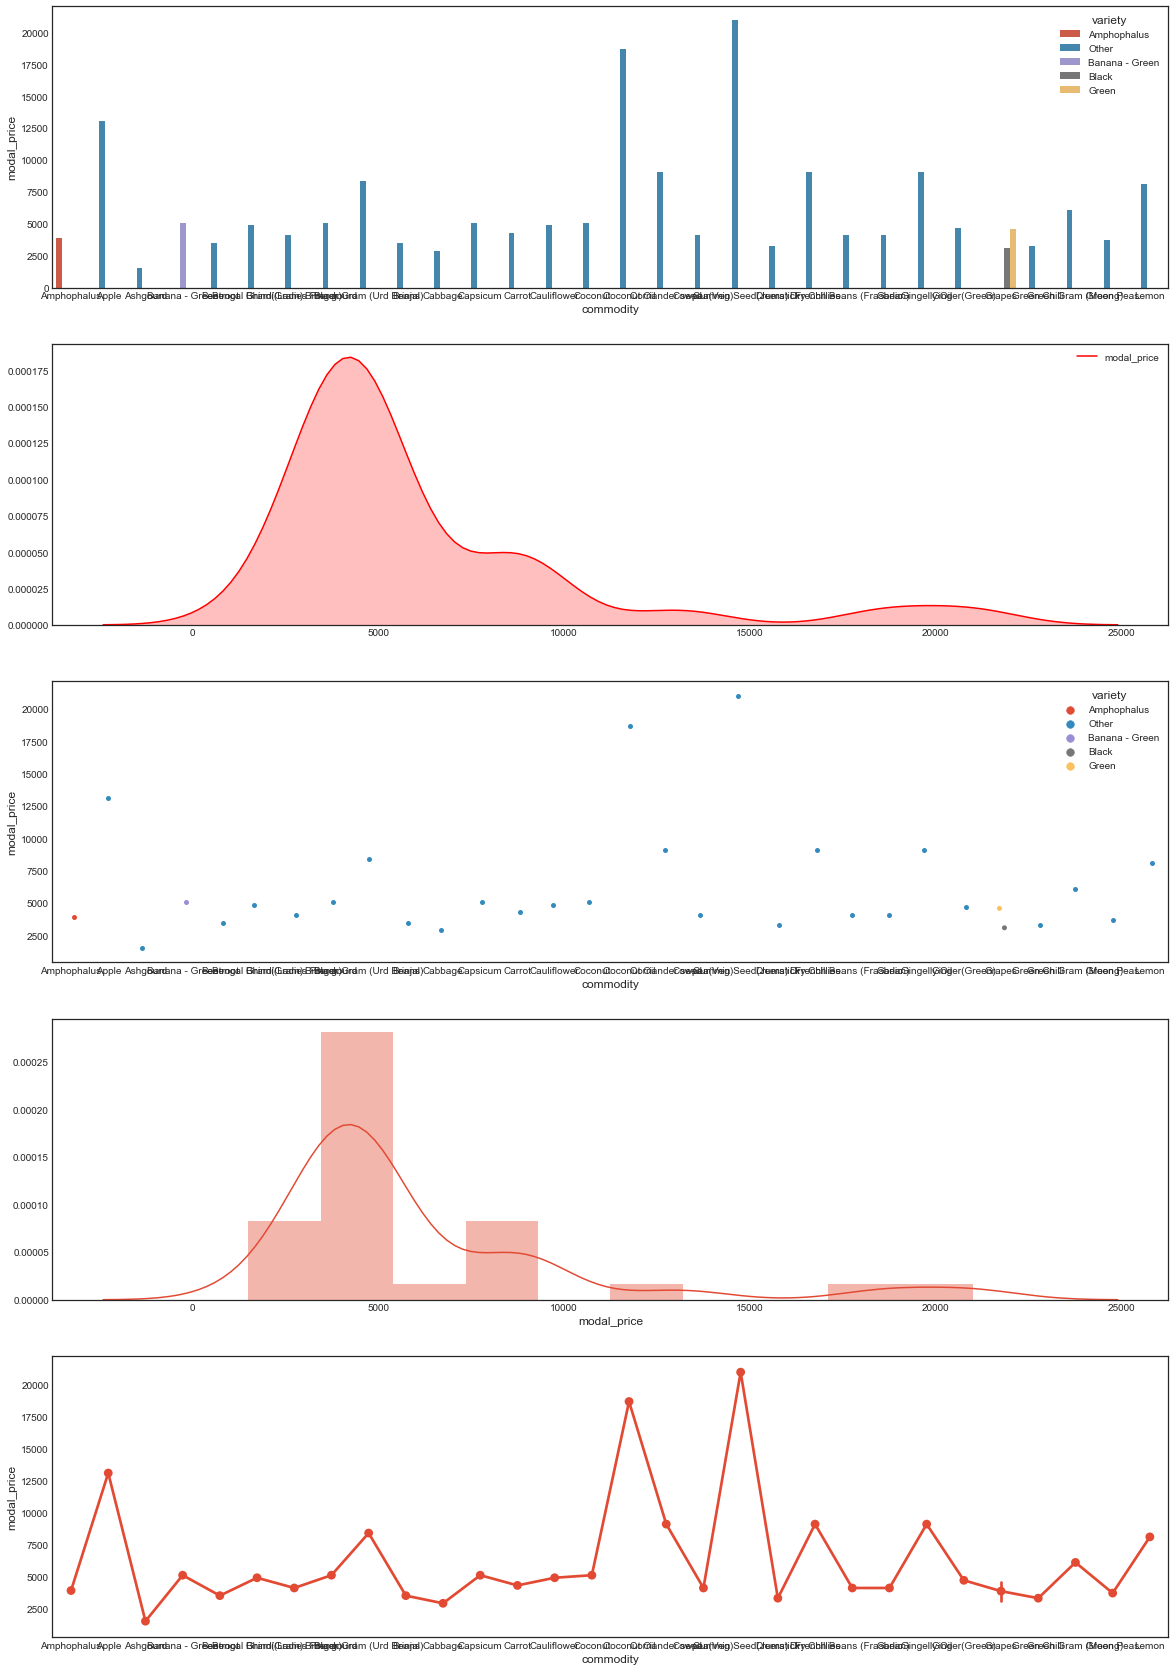

In [34]:
get_graphs("Kerala" , "Alappuzha" , "Aroor")

In [36]:
 def pairplot(state , district , market):
    gp = df.loc[(df.state == state) & (df.district == district) & (df.market == market), : ]
    g = sns.PairGrid(gp , hue = "variety")
    g = g.map_diag(plt.hist)
    g = g.map_offdiag(plt.scatter)
    g = g.add_legend()
    g = plt.figure(figsize=(15,10))
    fig.savefig("4.png") 

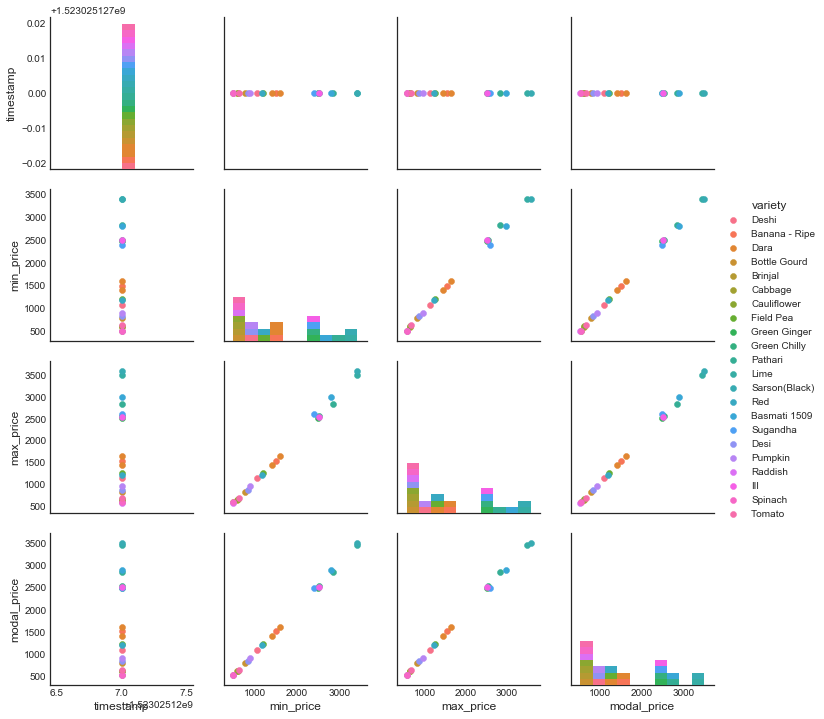

In [37]:
pairplot("Uttar Pradesh" , "Agra" , "Achnera")

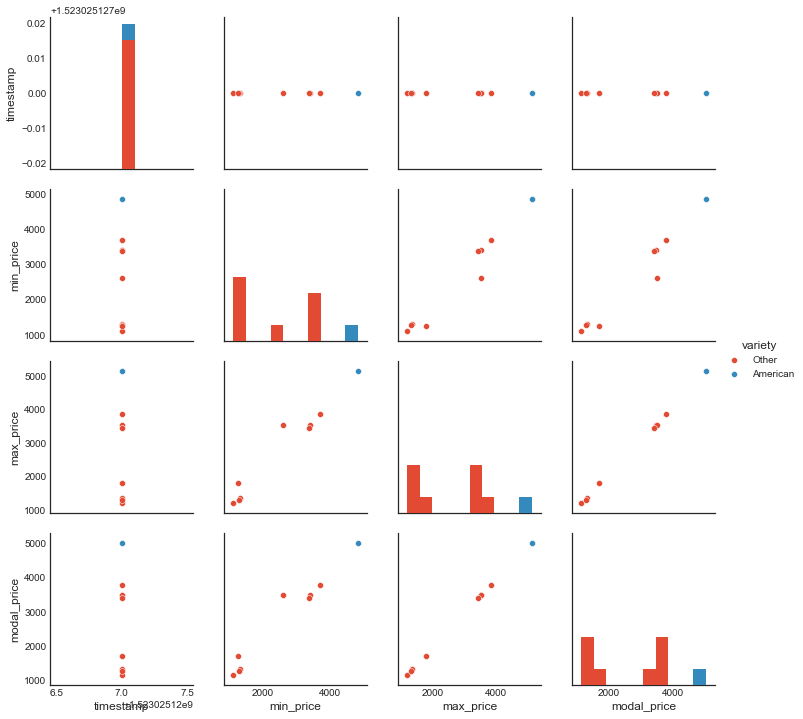

In [39]:
sns.pairplot(gp , hue = "variety")

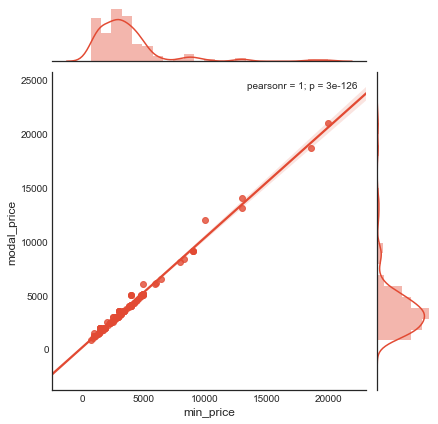

In [55]:
sns.jointplot(x="min_price", y="modal_price", data=gp , kind="reg")

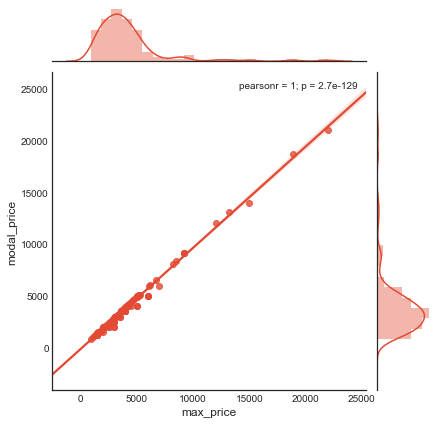

In [56]:
g = sns.jointplot(x="max_price", y="modal_price", data=gp , kind="reg")

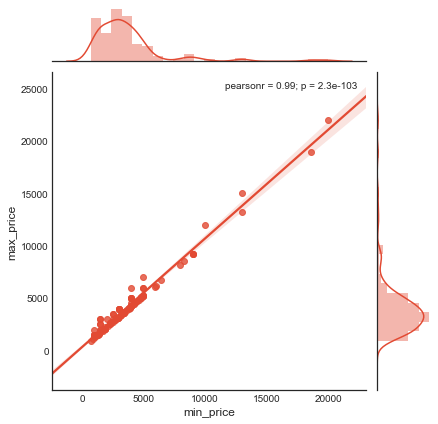

In [57]:
g = sns.jointplot(x="min_price", y="max_price", data=gp , kind="reg")

In [58]:
temp = df.loc[(df.state == "Uttar Pradesh") & (df.district == "Agra") & (df.commodity == "Potato"), : ]
temp

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
4718,1523025127,Uttar Pradesh,Agra,Achnera,Potato,Desi,06/04/2018,840.0,860.0,850.0
4752,1523025127,Uttar Pradesh,Agra,Agra,Potato,Desi,06/04/2018,850.0,980.0,910.0
4771,1523025127,Uttar Pradesh,Agra,Fatehpur Sikri,Potato,Local,06/04/2018,800.0,940.0,870.0
4791,1523025127,Uttar Pradesh,Agra,Jagnair,Potato,Desi,06/04/2018,840.0,860.0,850.0
4811,1523025127,Uttar Pradesh,Agra,Jarar,Potato,Desi,06/04/2018,600.0,800.0,700.0
4835,1523025127,Uttar Pradesh,Agra,Khairagarh,Potato,Desi,06/04/2018,840.0,860.0,850.0


In [59]:
def get_val(state , district , commodity):
    temp = df.loc[(df.state == state) & (df.district == district) & (df.commodity == commodity), : ]
    fig, axes = plt.subplots(6,1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[0] )
    sns.pointplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[1] )
    #sns.stripplot(x="market", y="min_price", data=temp , jitter=True ,  ax = axes[1])
    #sns.distplot(temp.modal_price , ax = axes[3])
    sns.barplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[2] )
    sns.pointplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[3] )
    sns.barplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[4] )
    sns.pointplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[5] )
    fig.savefig("3.png")    

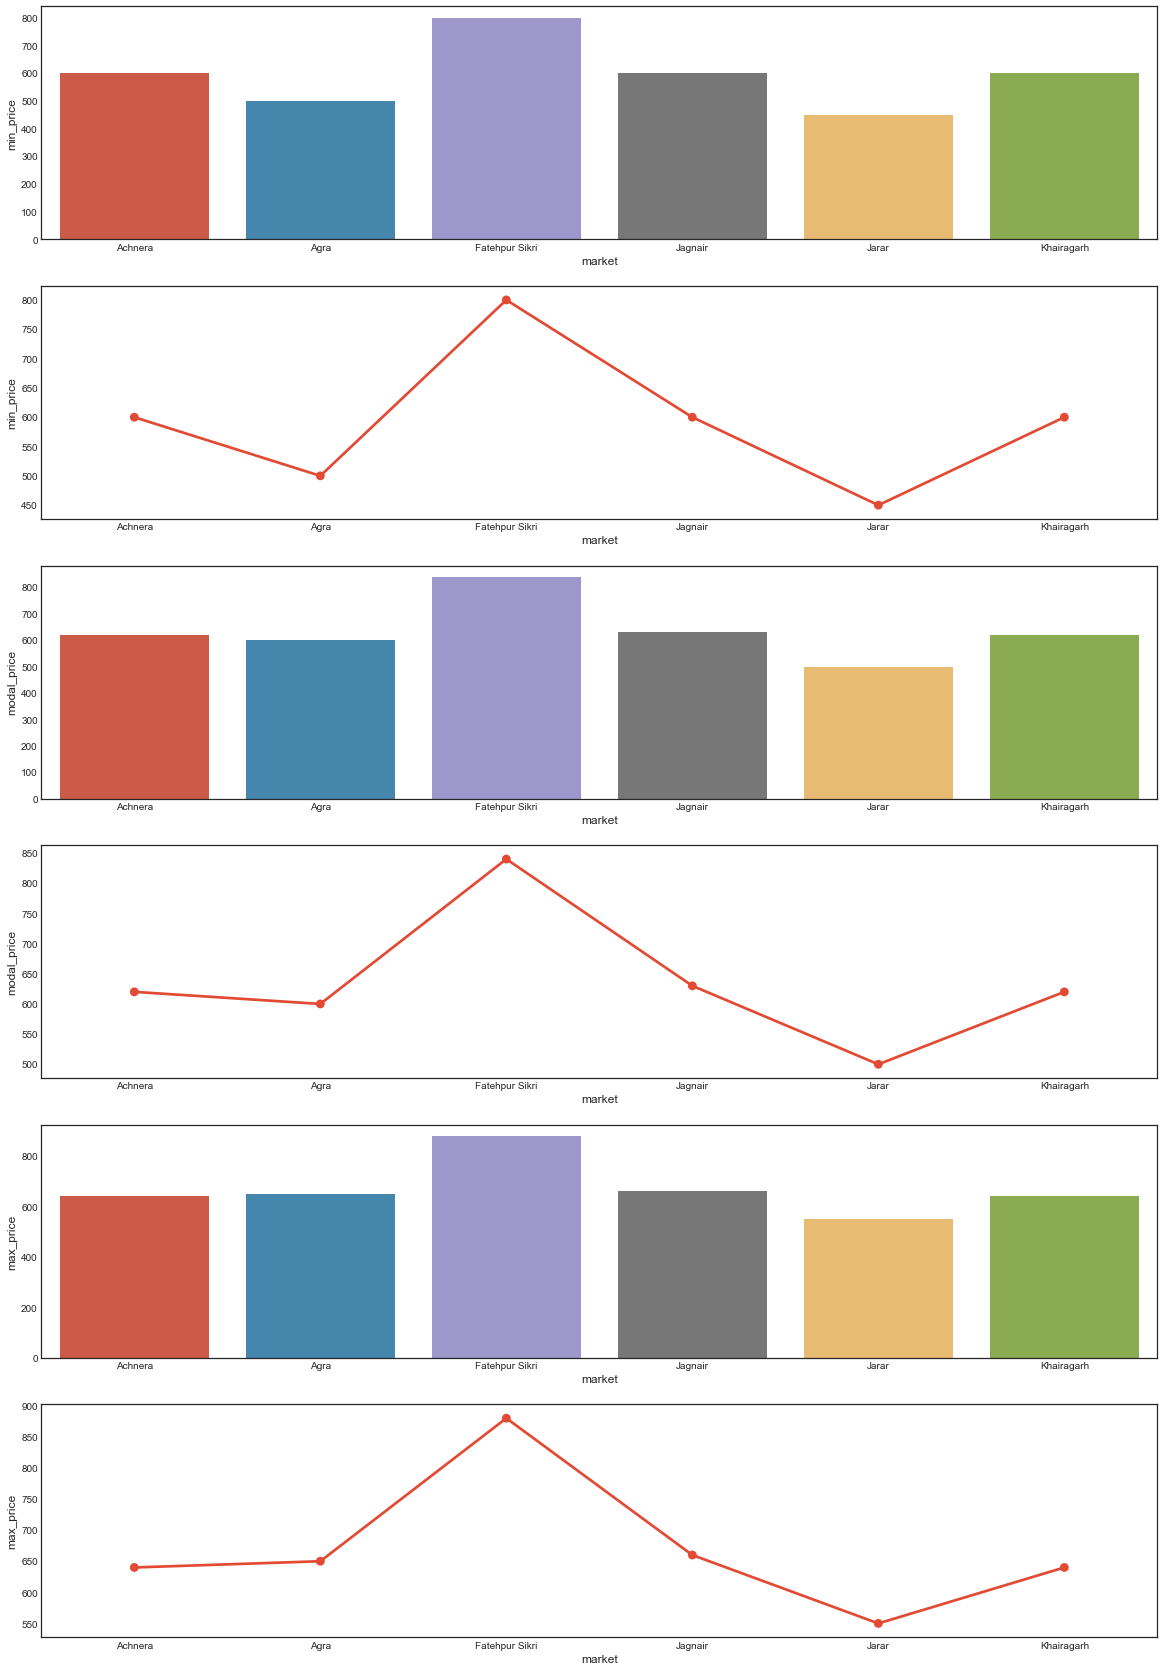

In [60]:
get_val("Uttar Pradesh" , "Agra" , "Brinjal")

In [38]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [61]:
df.groupby( ['state' , 'commodity'] ).mean()

timestamp    min_price  \
state       commodity                                               
Assam       Black Gram (Urd Beans)      1.523025e+09  2800.000000   
            Corriander seed             1.523025e+09  3500.000000   
            Green Chilli                1.523025e+09  1500.000000   
            Green Gram Dal (Moong Dal)  1.523025e+09  6200.000000   
            Jute                        1.523025e+09  3266.666667   
            Lentil(Masur)               1.523025e+09  4500.000000   
            Maida Atta                  1.523025e+09  2336.666667   
            Mustard                     1.523025e+09  3525.000000   
            Potato                      1.523025e+09   937.500000   
            Wheat Atta                  1.523025e+09  2280.000000   
Chattisgarh Bengal Gram(Gram)           1.523025e+09  3500.000000   
            Bhindi(Ladies Finger)       1.523025e+09  1000.000000   
            Lak(Teora)                  1.523025e+09  1500.000000   
            Lemon                       1.523025e+09  5400.000000   
            Mahua                       1.523025e+09  2433.333333   
            Maize                       1.523025e+09  1430.000000   
            Onion                       1.523025e+09  1100.000000   
            Paddy(Dhan)                 1.523025e+09  1517.100000   
            Potato                      1.523025e+09  1100.000000   
            Tinda                       1.523025e+09  2000.000000   
            Tomato                      1.523025e+09   200.000000   
Gujarat     Arhar (Tur/Red Gram)        1.523025e+09  3550.000000   
            Bajra(Pearl Millet/Cumbu)   1.523025e+09  1069.500000   
            Barley (Jau)                1.523025e+09  1382.500000   
            Beans                       1.523025e+09  4000.000000   
            Bengal Gram(Gram)           1.523025e+09  3433.333333   
            Black Gram (Urd Beans)      1.523025e+09  2424.166667   
            Bottle gourd                1.523025e+09   464.583333   
            Brinjal                     1.523025e+09   440.000000   
            Carrot                      1.523025e+09   866.666667   
...                                              ...          ...   
Uttrakhand  Papaya                      1.523025e+09  1000.000000   
            Potato                      1.523025e+09   470.909091   
            Pumpkin                     1.523025e+09   433.333333   
            Raddish                     1.523025e+09   200.000000   
            Tomato                      1.523025e+09   608.750000   
West Bengal Bhindi(Ladies Finger)       1.523025e+09  2720.000000   
            Bitter gourd                1.523025e+09  2580.000000   
            Black Gram (Urd Beans)      1.523025e+09  5166.666667   
            Brinjal                     1.523025e+09  1617.307692   
            Cabbage                     1.523025e+09   432.857143   
            Cucumbar(Kheera)            1.523025e+09  1116.666667   
            Ginger(Dry)                 1.523025e+09  4100.000000   
            Green Chilli                1.523025e+09  2889.583333   
            Green Gram (Moong)          1.523025e+09  7200.000000   
            Jute                        1.523025e+09  3496.153846   
            Lentil(Masur)               1.523025e+09  6100.000000   
            Masur Dal                   1.523025e+09  6033.333333   
            Mustard                     1.523025e+09  3557.692308   
            Mustard Oil                 1.523025e+09  9200.000000   
            Onion                       1.523025e+09  1020.625000   
            Paddy(Dhan)                 1.523025e+09  1602.458333   
            Pointed gourd (Parval)      1.523025e+09  3060.000000   
            Potato                      1.523025e+09   903.452381   
            Pumpkin                     1.523025e+09   860.000000   
            Rice                        1.523025e+09  2814.615385   
            Ridgeguard(Tori)            1